In [ ]:
pip install skimpy

In [ ]:
pip install transformers

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import nltk
from sklearn.model_selection import train_test_split
from skimpy import skim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/spotify-app-reviews-2022/reviews.csv')
df

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN


In [ ]:
df.drop(['Reply', 'Time_submitted', 'Total_thumbsup'], axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

201

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna()

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
...,...,...
61589,Even though it was communicated that lyrics fe...,1
61590,"Use to be sooo good back when I had it, and wh...",1
61591,This app would be good if not for it taking ov...,2
61592,The app is good hard to navigate and won't jus...,2


In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 61393  │ │ string      │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Rating              │     0 │        0 │      3.2 │    1.7 │     1 │      1 │      5 │       5 │  ▆▃ ▃▃█   │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Review                    │       0 │          0 │                           31 │                  1901671 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
def cleaning(text):
  text=text.lower()

  text=re.sub("\[.*#&]"," ",text)

  text=re.sub("https?://\S+|www\.\S+","",text)

  text=re.sub("[^a-zA-Z0-9\s]+","",text)

  text=re.sub('\w*\d\w*', '', text)

  text=re.sub(r'^\s+', '', text)

  w = text.split()

  text = ' '.join(w)
  text = re.sub('\s+', ' ', text).strip()
  return text

In [ ]:
df["Review"] = df["Review"].apply(cleaning)

In [ ]:
df

,Review,Rating
0,great music service the audio is high quality ...,5
1,please ignore previous negative rating this ap...,5
2,this popup get the best spotify experience on ...,4
3,really buggy and terrible to use as of recently,1
4,dear spotify why do i get songs that i didnt p...,1
...,...,...
61589,even though it was communicated that lyrics fe...,1
61590,use to be sooo good back when i had it and whe...,1
61591,this app would be good if not for it taking ov...,2
61592,the app is good hard to navigate and wont just...,2


In [ ]:
df = df[df["Review"] != '']

In [ ]:
df

,Review,Rating
0,great music service the audio is high quality ...,5
1,please ignore previous negative rating this ap...,5
2,this popup get the best spotify experience on ...,4
3,really buggy and terrible to use as of recently,1
4,dear spotify why do i get songs that i didnt p...,1
...,...,...
61589,even though it was communicated that lyrics fe...,1
61590,use to be sooo good back when i had it and whe...,1
61591,this app would be good if not for it taking ov...,2
61592,the app is good hard to navigate and wont just...,2


In [ ]:
def plot_most_common_words(df, Rating, n=10):
    counter = Counter(" ".join(df[df.Rating == Rating]['Review']).split())
    most_common = counter.most_common(n)
    words, counts = zip(*most_common)

    plt.barh(words, counts)
    plt.xlabel('Counts')
    plt.ylabel('Words')
    plt.title(f'Most Common Words for a rating of {Rating}')
    plt.show()

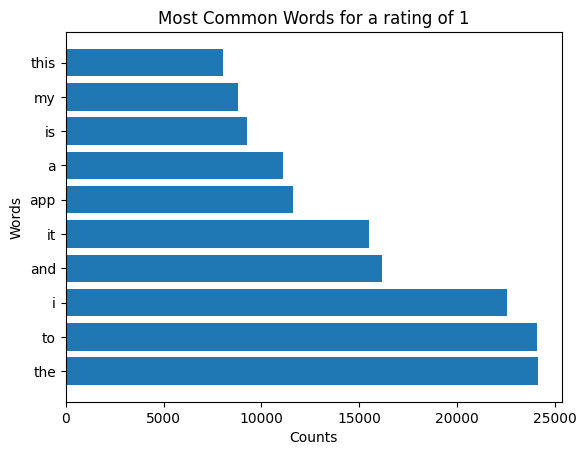

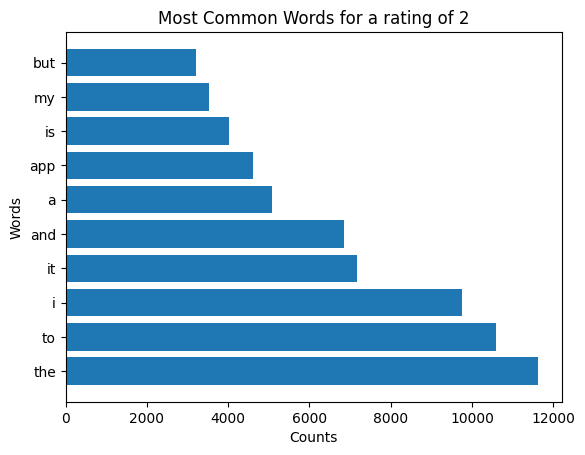

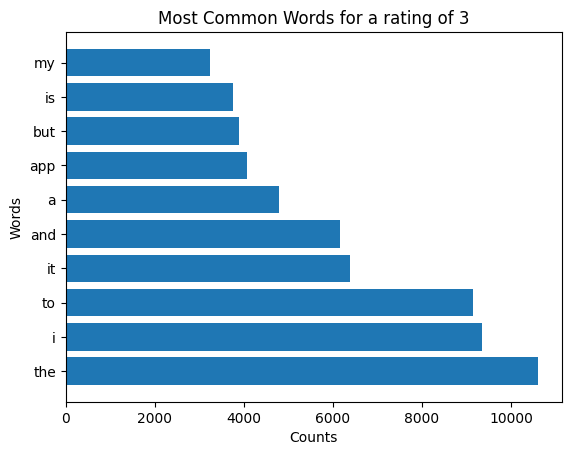

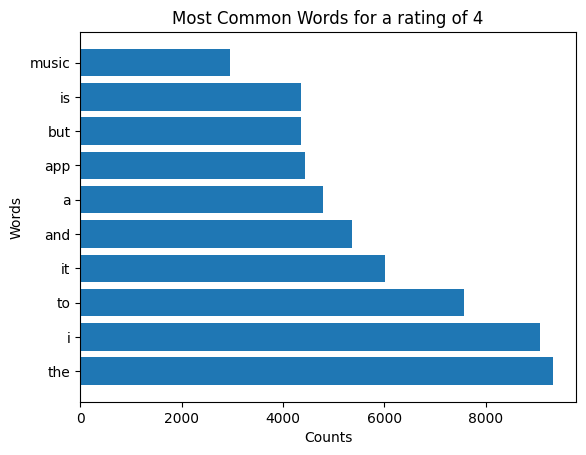

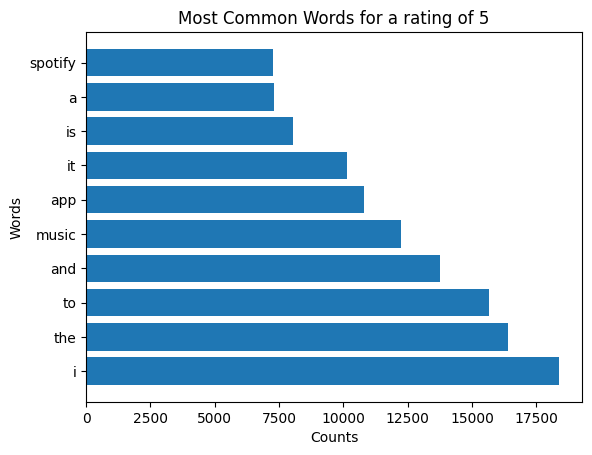

In [ ]:
for i in range(1,6):
  plot_most_common_words(df, i)

In [ ]:
from wordcloud import WordCloud

In [ ]:
def wc_most_commons_words(df, Rating):
    text = " ".join(df[df.Rating == Rating]['Review'])
    plt.figure(figsize = (10, 8))
    wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'wordmap {Rating}')
    plt.show()

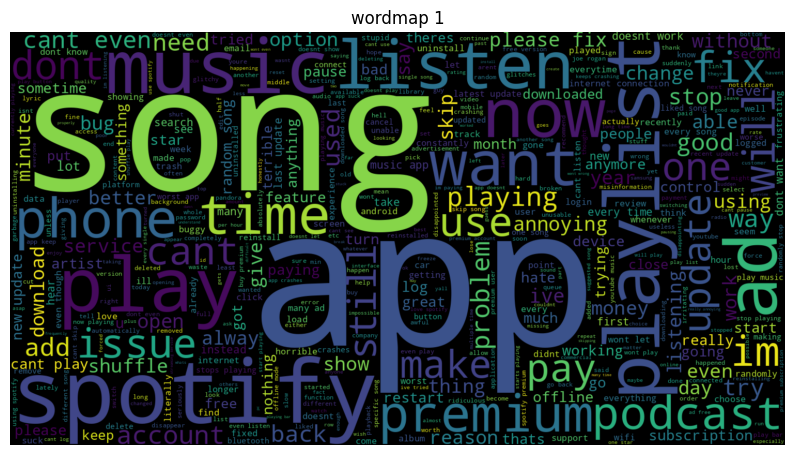

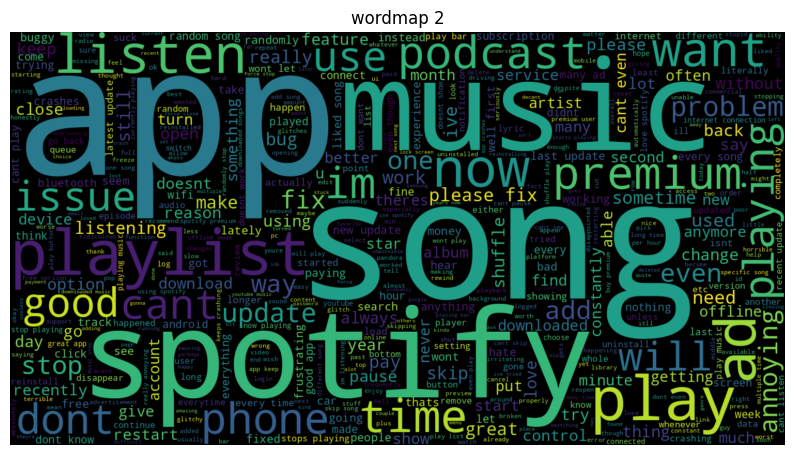

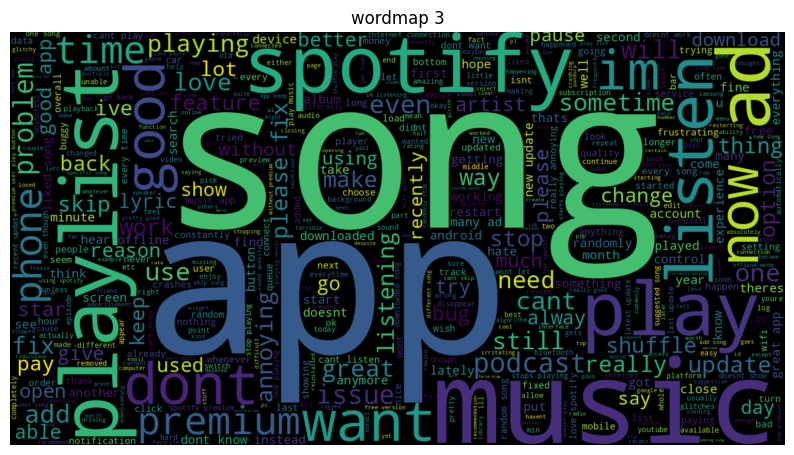

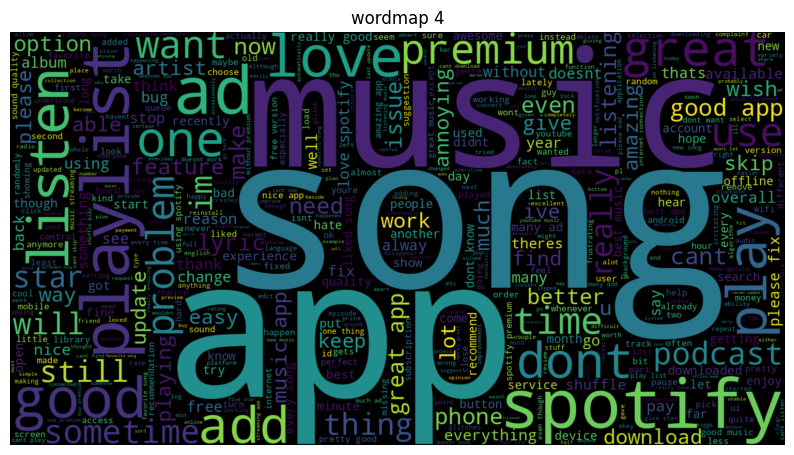

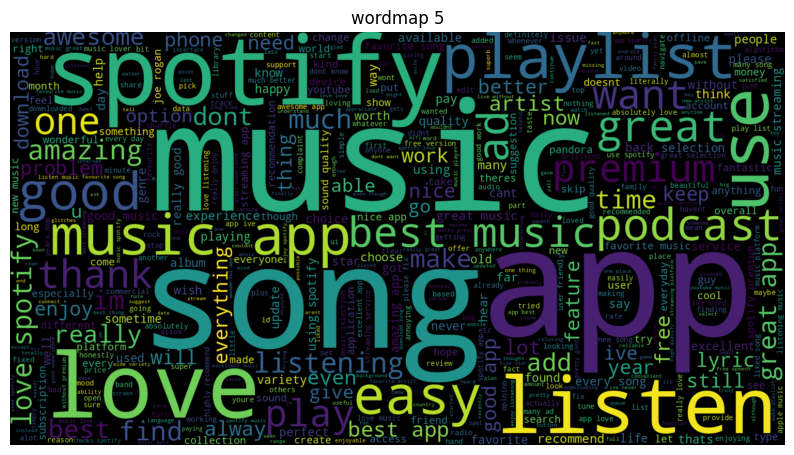

In [ ]:
for i in range(1,6):
  wc_most_commons_words(df, i)

In [ ]:
df_bis = df.copy()
df_bis["Words"] = df["Review"].str.split().apply(len)
df_bis

,Review,Rating,Words
0,great music service the audio is high quality ...,5,21
1,please ignore previous negative rating this ap...,5,15
2,this popup get the best spotify experience on ...,4,18
3,really buggy and terrible to use as of recently,1,9
4,dear spotify why do i get songs that i didnt p...,1,21
...,...,...,...
61589,even though it was communicated that lyrics fe...,1,46
61590,use to be sooo good back when i had it and whe...,1,55
61591,this app would be good if not for it taking ov...,2,98
61592,the app is good hard to navigate and wont just...,2,58


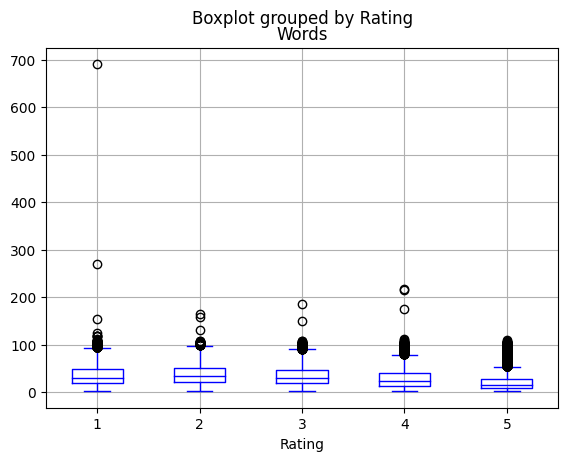

In [ ]:
df_bis.boxplot(column="Words", by="Rating", grid=True, showfliers=True,color='blue')
plt.show()

In [ ]:
df["Rating"] = df["Rating"] - 1

<ipython-input-132-2f0137bdfe9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rating"] = df["Rating"] - 1


In [ ]:
df

,Review,Rating
0,great music service the audio is high quality ...,4
1,please ignore previous negative rating this ap...,4
2,this popup get the best spotify experience on ...,3
3,really buggy and terrible to use as of recently,0
4,dear spotify why do i get songs that i didnt p...,0
...,...,...
61589,even though it was communicated that lyrics fe...,0
61590,use to be sooo good back when i had it and whe...,0
61591,this app would be good if not for it taking ov...,1
61592,the app is good hard to navigate and wont just...,1


In [ ]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_data["Rating"].value_counts()

Rating
4    17605
0    14085
3     6273
1     5675
2     5467
Name: count, dtype: int64

In [ ]:
test_data["Rating"].value_counts()

Rating
4    4336
0    3530
3    1558
1    1439
2    1414
Name: count, dtype: int64

In [ ]:
train_data, validation_data = train_test_split(train_data, test_size=0.2, random_state=42)

In [ ]:
train_data["Rating"].value_counts()

Rating
4    14058
0    11315
3     4989
1     4543
2     4379
Name: count, dtype: int64

In [ ]:
validation_data["Rating"].value_counts()

Rating
4    3547
0    2770
3    1284
1    1132
2    1088
Name: count, dtype: int64

In [ ]:
for dataset in [train_data, test_data, validation_data]:
  dataset.reset_index(inplace=True,drop=True)

In [ ]:
train_data

,Review,Rating
0,well done spotify you made your free version s...,1
1,usually a pretty good app i mean its spotify j...,2
2,i was going to give the app stars because the ...,0
3,podcasts can sometimes restart after a commerc...,2
4,love this app surely recommend it to all age g...,4
...,...,...
39279,good app just sucks without payment it just ki...,3
39280,why does it keep writing no internet connectio...,0
39281,i updated my review to stars from stars becaus...,3
39282,i have been using this app for years but after...,2


In [ ]:
test_data

,Review,Rating
0,more and more ads as time goes on and frequent...,0
1,this is the worst good app i know ive been usi...,1
2,its the best app to listen to music but i thou...,4
3,this is a good app but in the last months i ha...,0
4,more commercials before min is up ongoing for ...,0
...,...,...
12272,love it so much and thanks for your app,4
12273,update this issue still persists and its annoy...,0
12274,i use primarily for podcasts though i enjoy th...,4
12275,i had spotify for years but never used it much...,4


In [ ]:
validation_data

,Review,Rating
0,bad due to ads at sevral time,0
1,really enjoying this app i get to pick exactly...,4
2,great ads can be a pain and cant afford to be ...,3
3,easy to navigate have always had the artist i ...,4
4,i always find the music that im looking for,4
...,...,...
9816,i canceled my account months ago and was just ...,0
9817,i cant log intoon it with my facebook account ...,1
9818,can listen even if phone is not in spotify window,4
9819,its difficult to listen to a playlist to go to...,2


In [ ]:
train_data.to_csv('/content/drive/MyDrive/SPOTIFY-CLASSIF/spotify_train.csv')

In [ ]:
test_data.to_csv('/content/drive/MyDrive/SPOTIFY-CLASSIF/spotify_test.csv')

In [ ]:
validation_data.to_csv('/content/drive/MyDrive/SPOTIFY-CLASSIF/spotify_validation.csv')